In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import requests
import calendar
import datetime


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

# Hello world!

I'm trying to learn the very basics of data manipulation with Pandas through this project. My goal is to become familiar with cleaning, extracting and making sense of data.

Using the Dataset, I will attempt to predict the likeliness of cars becoming damaged based on their brands, gearbox types, fuel use etc.

Any Advice would be awesome.

# Extracting Dataframe from filepath

In [4]:
filepath = "~/code1161base/OpenData/autos.csv"
autos = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'],
                           dayfirst=True)

autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [5]:
type(autos["yearOfRegistration"])

pandas.core.series.Series

# Data Description

In [6]:
autos.shape

(371528, 20)

The shape of the dataframe is 371528 rows long, and 20 columns wide.

In [7]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


371528 cars with 20 columns of description

In [8]:
autos.columns

Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

# DateCrawled

In [9]:
dateCrawled_vc = autos["dateCrawled"].value_counts()

dateCrawled_vc

2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-03-20 16:50:22    5
2016-03-31 16:50:28    5
2016-03-22 14:50:05    5
2016-03-29 22:50:49    5
2016-03-08 15:50:29    5
2016-04-01 19:25:23    5
2016-04-01 16:52:05    5
2016-03-05 14:44:30    5
2016-03-22 10:42:10    5
2016-03-19 12:50:39    5
2016-04-02 14:50:21    5
2016-03-26 10:51:07    5
2016-04-01 15:56:46    5
2016-04-02 21:54:36    5
2016-03-16 13:47:44    5
2016-03-16 17:43:49    5
2016-03-09 13:50:56    5
2016-04-02 22:54:55    5
2016-03-22 15:50:32    5
2016-03-28 10:48:11    5
2016-03-21 14:50:20    5
2016-03-05 14:25:23    5
2016-04-03 13:41:21    5
2016-04-04 22:38:11    5
2016-03-14 16:51:53    5
2016-03-09 16:48:39    5
2016-03-31 17:57:07    5
                      ..
2016-03-11 14:52:42    1
2016-03-19 16:37:43    1
2016-03-30 13:55:25    1
2016-03-24 20:00:24    1
2016-03-09 16:51:03    1
2016-03-20 15:57:34    1
2016-03-31 14:45:13    1
2016-03-28 10:56:58    1
2016-03-20 23:52:53    1


# Name

In [10]:
name_vc = autos["name"].value_counts()

name_vc

Ford_Fiesta                                                           657
BMW_318i                                                              627
Opel_Corsa                                                            622
Volkswagen_Golf_1.4                                                   603
BMW_316i                                                              523
BMW_320i                                                              492
Volkswagen_Polo                                                       475
Renault_Twingo                                                        447
Volkswagen_Golf                                                       428
Volkswagen_Golf_1.6                                                   413
Volkswagen_Polo_1.2                                                   412
BMW_116i                                                              394
Opel_Corsa_1.2_16V                                                    373
Opel_Corsa_B                          

# Seller

In [11]:
seller_vc = autos["seller"].value_counts()

seller_vc

privat        371525
gewerblich         3
Name: seller, dtype: int64

# offerType

In [12]:
offerType_vc = autos["offerType"].value_counts()

offerType_vc

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

# price

In [13]:
price_vc = autos["price"].value_counts()

price_vc

0          10778
500         5670
1500        5394
1000        4649
1200        4594
2500        4438
600         3819
3500        3792
800         3784
2000        3432
999         3364
750         3203
650         3150
4500        3053
850         2946
2200        2936
700         2936
1800        2886
900         2874
950         2793
1100        2772
1300        2757
300         2731
3000        2720
550         2591
1600        2570
5500        2543
350         2514
400         2442
1250        2441
           ...  
22599          1
4782           1
8008           1
20290          1
50100          1
3245           1
58800          1
2795000        1
75400          1
10830          1
588            1
31555          1
3755           1
19269          1
14666          1
28995          1
4175           1
10670          1
77             1
8265           1
145900         1
2730           1
12973          1
42840          1
30530          1
23456          1
171000         1
21830         

Seems to have 10778 cars with no price listed.

# abtest

In [14]:
abtest_vc = autos["abtest"].value_counts()

abtest_vc

test       192585
control    178943
Name: abtest, dtype: int64

# vehicleType

In [15]:
vehicleType_vc = autos["vehicleType"].value_counts()

vehicleType_vc

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

# yearOfRegistration

In [16]:
yearOfRegistration_vc = autos["yearOfRegistration"].value_counts()

yearOfRegistration_vc

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10886
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
        ...  
5900        1
2066        1
6500        1
9229        1
8500        1
8200        1
2290        1
3700        1
1200        1
9450        1
1001        1
1255        1
1253        1
5600        1
3800        1
4800        1
7100        1
5300        1
3500        1
1911        1
2200        1
1688        1
1925        1
3200        1
1920        1
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, dtype: int64

Filtering needed for years out of range 1950 to 2017

# gearbox

In [17]:
gearbox_vc = autos["gearbox"].value_counts()

gearbox_vc

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

# powerPS

In [18]:
powerPS_vc = autos["powerPS"].value_counts()

powerPS_vc

0        40820
75       24035
60       15907
150      15442
140      13585
101      13313
90       12748
116      11963
170      10982
105      10429
125       7051
136       6952
102       6500
163       6287
54        5752
143       5547
122       5322
131       5179
110       4862
109       4817
50        4661
80        4050
120       3914
177       3886
58        3855
69        3655
115       3332
95        3023
45        2991
68        2828
         ...  
15017        1
685          1
7515         1
6062         1
1625         1
1707         1
602          1
1202         1
337          1
8011         1
1100         1
15033        1
3144         1
442          1
953          1
3000         1
331          1
587          1
332          1
952          1
6226         1
696          1
589          1
1102         1
1870         1
5815         1
16051        1
1360         1
5809         1
1398         1
Name: powerPS, dtype: int64

40820 amount of cars are at 0 horsepower, assuming either totaled or user not defined and will be filtered.

0 powerPS would be considered totaled or not listed

Filtering needed for horse power outside of range 600

# model

In [19]:
model_vc = autos["model"].value_counts()
model_vc

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

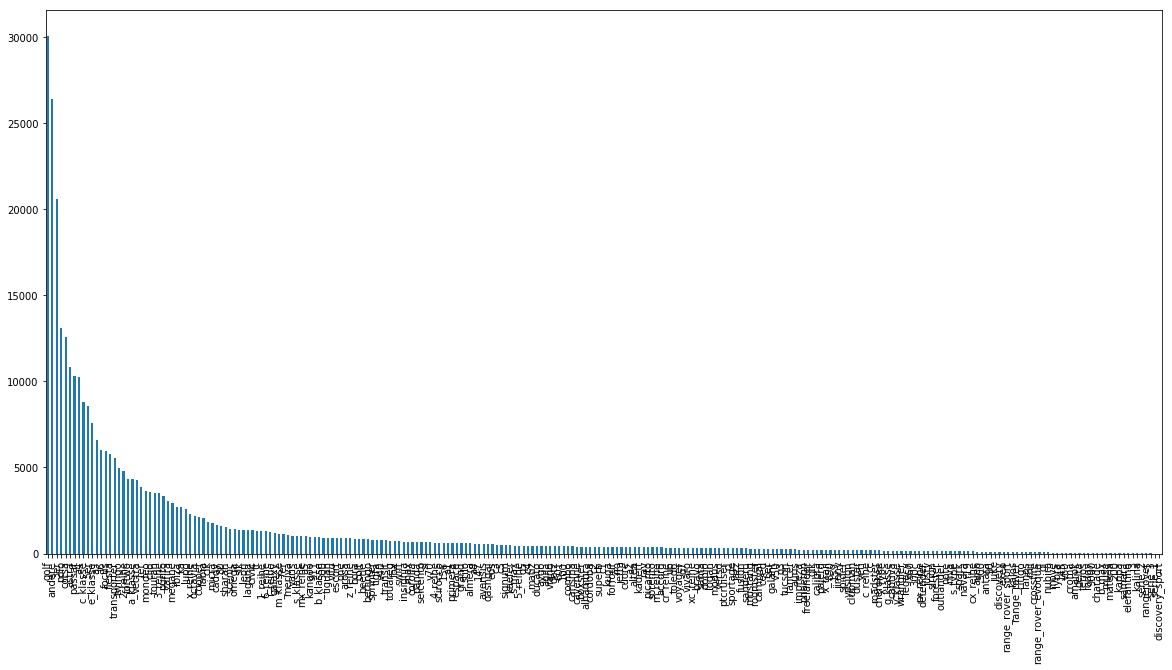

In [20]:
model_vc.plot(kind='bar')

# kilometer

In [21]:
kilometer_vc = autos["kilometer"].value_counts()

kilometer_vc

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: kilometer, dtype: int64

# monthOfRegistration

In [22]:
monthOfRegistration_vc = autos["monthOfRegistration"].value_counts()

monthOfRegistration_vc

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

# fuelType

In [23]:
fuelType_vc = autos["fuelType"].value_counts()

fuelType_vc

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

# Brand

In [24]:
brand_vc = autos["brand"].value_counts()

brand_vc

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

# notRepairDamage

In [25]:
notRepairedDamage_vc = autos["notRepairedDamage"].value_counts()

notRepairedDamage_vc

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

# dateCreated

In [26]:
dateCreated_vc = autos["dateCreated"].value_counts()

dateCreated_vc

2016-04-03    14450
2016-04-04    14022
2016-03-20    13547
2016-03-12    13379
2016-03-21    13305
2016-03-14    13088
2016-03-28    13069
2016-04-02    12991
2016-03-07    12821
2016-03-19    12752
2016-03-09    12723
2016-03-29    12714
2016-04-01    12623
2016-03-30    12402
2016-03-15    12399
2016-03-08    12396
2016-03-25    12264
2016-03-11    12181
2016-03-10    12050
2016-03-22    11958
2016-03-26    11920
2016-03-31    11872
2016-03-23    11856
2016-03-17    11610
2016-03-16    11285
2016-03-27    11161
2016-03-24    11132
2016-03-05     8528
2016-03-13     6318
2016-03-06     5752
              ...  
2016-01-20        2
2016-01-18        2
2015-11-23        2
2016-01-22        2
2015-11-24        2
2016-01-16        2
2016-02-04        2
2016-01-14        1
2015-12-28        1
2015-03-20        1
2015-12-06        1
2015-11-08        1
2015-10-14        1
2015-06-18        1
2015-06-11        1
2015-12-17        1
2015-11-10        1
2015-08-07        1
2015-12-27        1


# nrOfPictures

In [27]:
nrOfPictures_vc = autos["nrOfPictures"].value_counts()

nrOfPictures_vc

0    371528
Name: nrOfPictures, dtype: int64

Filtering variables of nrOfPictures

# PostalCode

In [28]:
postalCode_vc = autos["postalCode"].value_counts()

postalCode_vc

10115    828
65428    637
66333    349
38518    326
44145    323
32257    323
52525    314
78224    309
26789    301
48599    294
13357    293
53757    284
50354    283
40764    282
48249    282
60311    281
51065    278
52249    277
60386    275
61169    269
92637    266
26871    265
66424    265
56070    262
45881    262
65719    261
13409    257
87700    257
59192    254
44339    254
        ... 
55499      1
67311      1
21784      1
38325      1
63874      1
21360      1
95356      1
26906      1
29361      1
17154      1
79685      1
91471      1
88376      1
77787      1
95694      1
27254      1
60306      1
7619       1
29587      1
91465      1
25946      1
4685       1
98749      1
74937      1
24638      1
97859      1
29484      1
85071      1
17329      1
37297      1
Name: postalCode, dtype: int64

# lastSeen

In [29]:
lastSeen_vc = autos["lastSeen"].value_counts()

lastSeen_vc

2016-04-06 13:45:54    17
2016-04-07 06:45:59    17
2016-04-06 22:44:53    16
2016-04-06 07:45:46    16
2016-04-07 08:45:09    16
2016-04-07 00:45:17    16
2016-04-07 09:46:25    16
2016-04-07 07:17:35    16
2016-04-06 13:15:54    16
2016-04-06 05:45:43    16
2016-04-06 09:44:33    16
2016-04-07 08:16:54    16
2016-04-07 09:15:43    16
2016-04-06 03:15:56    16
2016-04-07 06:45:32    16
2016-04-06 10:15:26    16
2016-04-07 08:15:52    16
2016-04-07 05:44:30    16
2016-04-07 06:45:12    16
2016-04-07 13:17:48    16
2016-04-06 09:17:58    16
2016-04-07 09:44:27    16
2016-04-06 01:15:23    16
2016-04-06 09:46:00    16
2016-04-07 10:46:23    16
2016-04-07 07:46:26    16
2016-04-06 01:16:21    16
2016-04-06 04:15:59    16
2016-04-07 07:44:31    16
2016-04-06 04:17:20    16
                       ..
2016-04-03 12:58:34     1
2016-04-02 05:16:06     1
2016-03-22 07:48:52     1
2016-03-26 09:41:00     1
2016-03-14 19:41:48     1
2016-03-17 09:16:59     1
2016-03-14 16:31:22     1
2016-03-30 0

    dateCrawled : when this ad was first crawled, all field-values are taken from this date
    name : "name" of the car
    seller : private or dealer
    offerType
    price : the price on the ad to sell the car
    abtest
    vehicleType
    yearOfRegistration : at which year the car was first registered
    gearbox
    powerPS : power of the car in PS
    model
    kilometer : how many kilometers the car has driven
    monthOfRegistration : at which month the car was first registered
    fuelType
    brand
    notRepairedDamage : if the car has a damage which is not repaired yet
    dateCreated : the date for which the ad at ebay was created
    nrOfPictures : number of pictures in the ad 
    postalCode
    lastSeenOnline : when the crawler saw this ad last online

# Cleaning Dataframe

## Clearing variables from new Dataframe

Some columns are useless

In [30]:
print(autos.seller.unique())
print(autos.offerType.unique())
print(autos.abtest.unique())
print(autos.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


## Here the old dataframe is converted into a new dataframe so that the original dataframe is not affected.

In [31]:
autosdf = autos.drop(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'nrOfPictures'], axis=1)


autosdf = autosdf[pd.notnull(autosdf['model'])]
autosdf = autosdf[pd.notnull(autosdf['gearbox'])]
autosdf.dropna()

autosdf.columns



Index([u'price', u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS',
       u'model', u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'postalCode', u'lastSeen'],
      dtype='object')

[name] is way too messy for any meaningful analysis in my abilities, dropped for irrelevance.

[Seller] and [nrOfPictures] have only one value, while [offerType] and [abtest] has no relevance for the analysis.The [dateCrawled] column is the date of which the ad is 'crawled' by the datacrawler, not relevant.

Therefore I modify the dataframe dropping all those features.

I remove [lastSeen], [dateCreated] and [postalCode] as well, as these factors are only related to the ad instead of the car.


## Checking to see if the original dataframe is affected

In [32]:
autos.columns

Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

# Setting lower and upper bounds of price using Quantiles

Assigning the value of the 0.001 th value and the 0.999 th value to variables 'lower' and 'upper'

Surely there are better ways to do it, but this is fun too.

In [33]:
lowerPrice, upperPrice = autosdf['price'].quantile([0.001, 0.999]).tolist()

print upperPrice
print lowerPrice

print "Car models priced between ${} and ${} will remain in the dataframe".format(upperPrice, lowerPrice)

87984.903
0.0
Car models priced between $87984.903 and $0.0 will remain in the dataframe


# Setting lower and upper for 'powerPS' using Quantiles.

Again, using quantiles to set boundary for [powerPS]

In [34]:
# Assigning lowerPS and upperPS to a list
lowerPS, upperPS = autosdf['powerPS'].quantile([0.001, 0.999]).tolist()

print upperPS
print lowerPS

print "Cars with power higher than {}ps will be excluded, TOO MUCH POWER!".format(int(upperPS))

612.0
0.0
Cars with power higher than 612ps will be excluded, TOO MUCH POWER!


## Cleaning Rows from new Dataframe

In 1885, Karl Benz developed a petrol or gasoline powered automobile. This is also considered to be the first "production" vehicle as Benz made several other identical copies.

No car should be registered before his or after 2017?

In [35]:
# price filtering
autosdf = autosdf[(autosdf['price'] > lowerPrice) & (autosdf['price'] < upperPrice)]

# power filtering
autosdf = autosdf[(autosdf['powerPS'] > 0) & (autosdf['powerPS'] < upperPS)]

# yearofrego filtering
autosdf = autosdf[(autosdf['yearOfRegistration'] > 1885) & (autosdf['yearOfRegistration'] < 2017)]




autosdf.head(5)


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:17
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06 10:17:21
5,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,2016-04-06 19:17:07
6,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,2016-04-05 18:18:39


# Let's check to see how much data we've kept

In [36]:
print("Data kept for analisys: {} percent of the entire set".format(100 * autosdf['price'].count() / autos['price'].count()))

Data kept for analisys: 79 percent of the entire set


Cool, 

# New Value Counts

Here we assign new value counts to variables

In [37]:
price_vc = autosdf['price'].value_counts()
vehicleType_vc = autosdf['vehicleType'].value_counts()
yearOfRegistration_vc = autosdf['yearOfRegistration'].value_counts()
gearbox_vc = autosdf['gearbox'].value_counts()
power_vc = autosdf['powerPS'].value_counts()
model_vc = autosdf['model'].value_counts()
monthOfRegistration_vc = autosdf['monthOfRegistration'].value_counts()
fuelType_vc = autosdf['fuelType'].value_counts()
brand_vc = autosdf['brand'].value_counts()
notRepairedDamage_vc = autosdf['notRepairedDamage'].value_counts()
dateCreated_vc = autosdf['dateCreated'].value_counts()
postalCode_vc = autosdf['postalCode'].value_counts()
lastSeen_vc = autosdf['lastSeen'].value_counts()

# Top 10 of models sold

The 10 most popular models using valuecount.

What's andere? I've never hear of that model, bit of googling and it's "other" in German

In [38]:
model_top10 = model_vc[:10]
model_top10

golf        25105
andere      21877
3er         17999
polo        10531
corsa        9889
a4           9083
astra        8948
passat       8841
5er          7717
c_klasse     7693
Name: model, dtype: int64

golf = VW golf
andere = other
3er = BMW 3 Series
polo = VW polo
corsa = Opal Corsa
astra = Opal Astra
a4 = Audi A4
passat = VW Passat
c_klasse = Benz C class
5er = BMW 5 Series


# Setting some useful variables for comparison

In [39]:
# Assigning variables using boolean filtering

# Automatic or Manual
is_automatic = autosdf['gearbox'] == 'automatik'
is_manual = autosdf['gearbox'] == 'manuell'

# Damaged or not
is_damaged = autosdf['notRepairedDamage'] == 'ja'
is_notdamaged = autosdf['notRepairedDamage'] == 'nein'

In [40]:
automaticCount = autosdf[is_automatic]['gearbox'].value_counts()
automaticCount

automatik    66636
Name: gearbox, dtype: int64

In [41]:
manualCount = autosdf[is_manual]['gearbox'].value_counts()
manualCount

manuell    229393
Name: gearbox, dtype: int64

# what's the percentage of Damaged automatic cars?

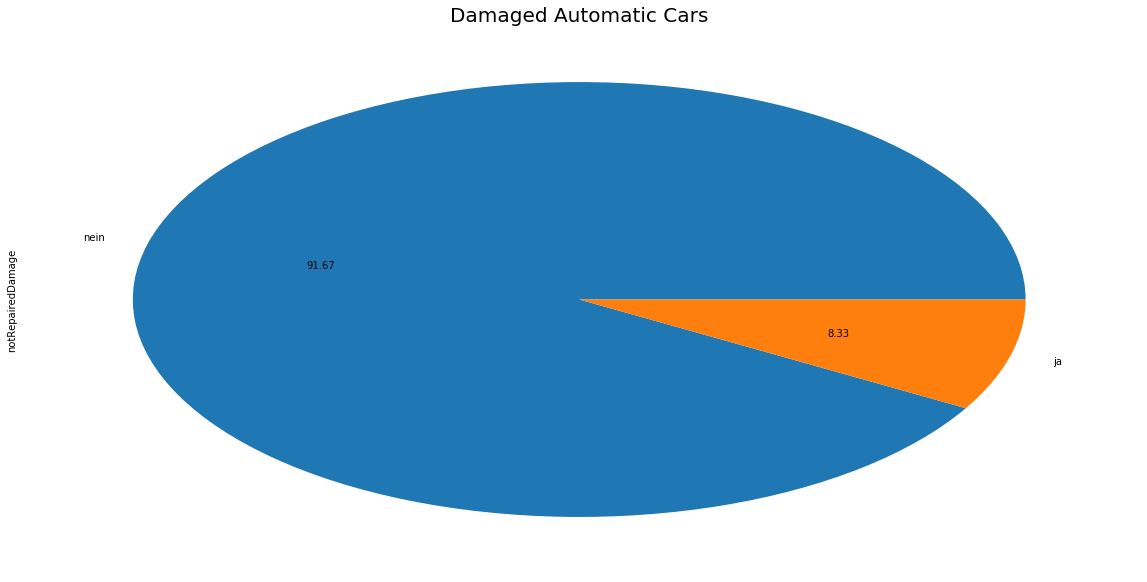

In [42]:
damagedAutomatic = autosdf[is_automatic]['notRepairedDamage'].value_counts()
damagedAutomatic.plot(kind='pie', autopct='%.2f')
plt.title("Damaged Automatic Cars", fontsize=20)

plt.show()

8.33% of automatic cars are damaged

# What about Manual cars?

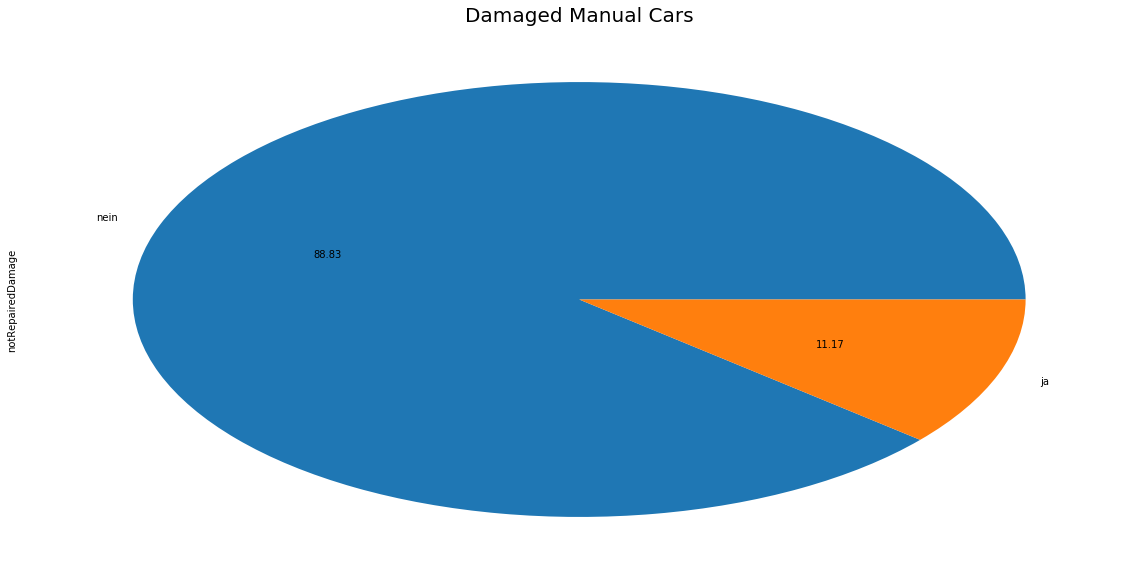

In [43]:
damagedManual = autosdf[is_manual]['notRepairedDamage'].value_counts()
damagedManual.plot(kind="pie", autopct='%.2f')

plt.title("Damaged Manual Cars", fontsize=20)

plt.show()

11.17% of Manual cars are damaged.

# Statistically speaking, Manual drivers are worse drivers hahaha

# What about the Average Horsepower of each brand?

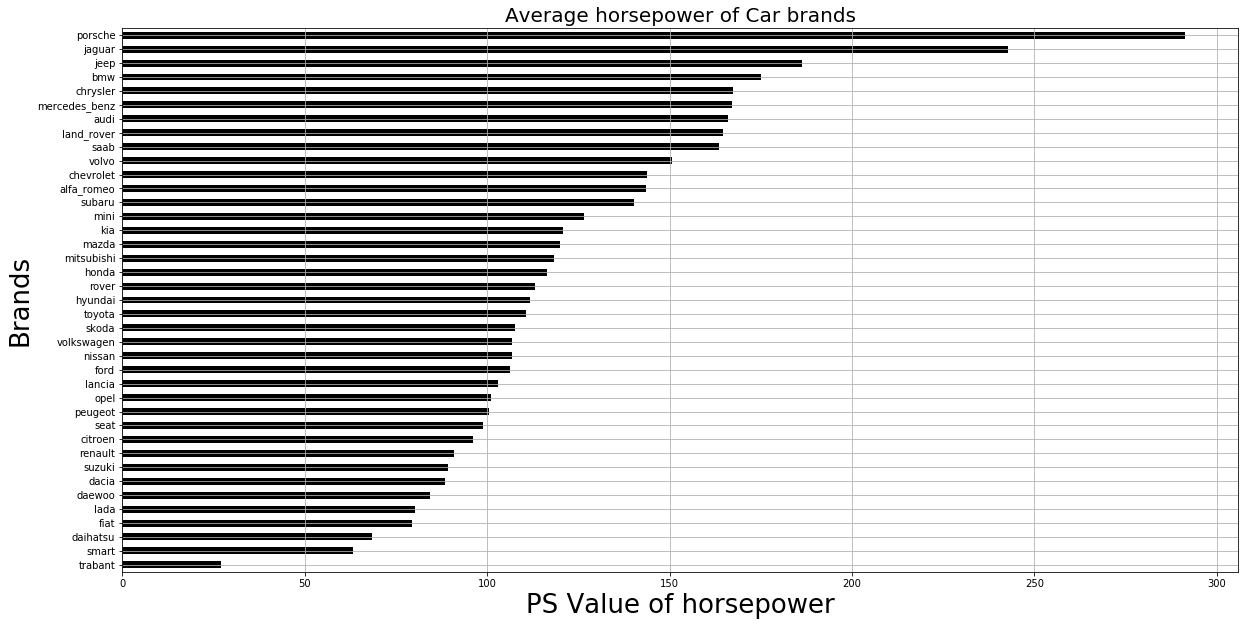

In [44]:
brandPS = autosdf.groupby('brand').powerPS.mean()
brandPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average horsepower of Car brands", fontsize=20)
plt.xlabel('PS Value of horsepower', fontsize=26)
plt.ylabel('Brands', fontsize=26)
plt.grid(True)
plt.show()

# Which one's got more horses, Automatic or Manual?

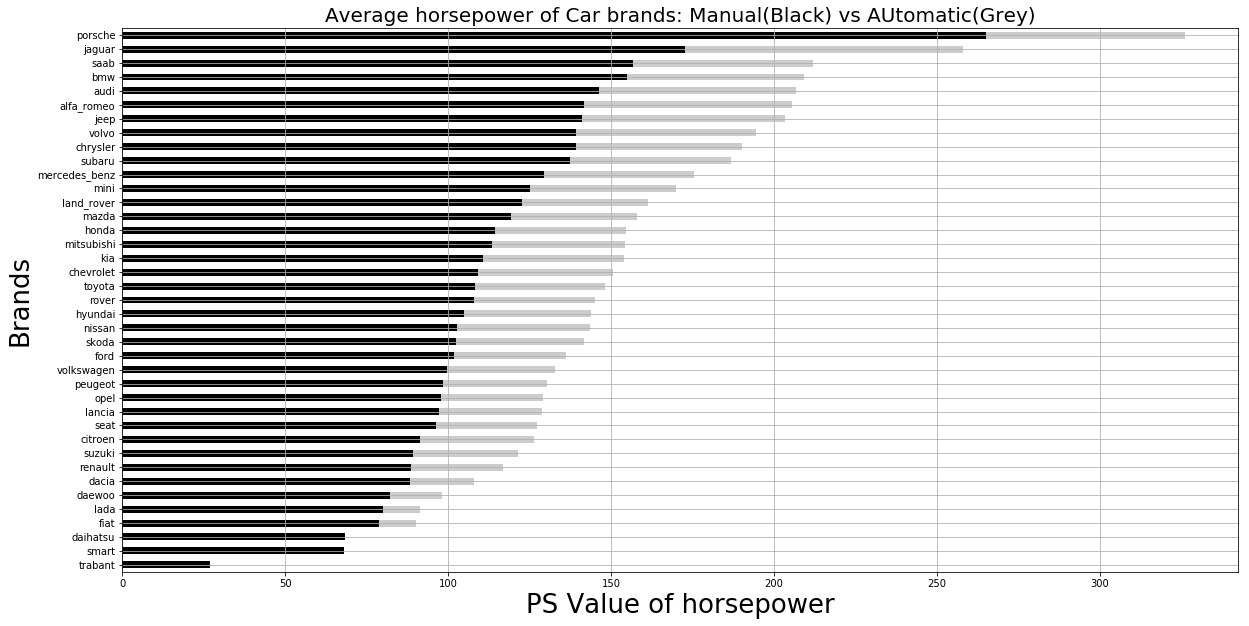

In [50]:
autobrandPS = autosdf[is_automatic].groupby('brand').powerPS.mean()
autobrandPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)

manualbrandPS = autosdf[is_manual].groupby('brand').powerPS.mean()
manualbrandPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=1)

plt.title("Average horsepower of Car brands: Manual(Black) vs AUtomatic(Grey)", fontsize=20)
plt.xlabel('PS Value of horsepower', fontsize=26)
plt.ylabel('Brands', fontsize=26)
plt.grid(True)
plt.show()

# What about the type of vehicle?

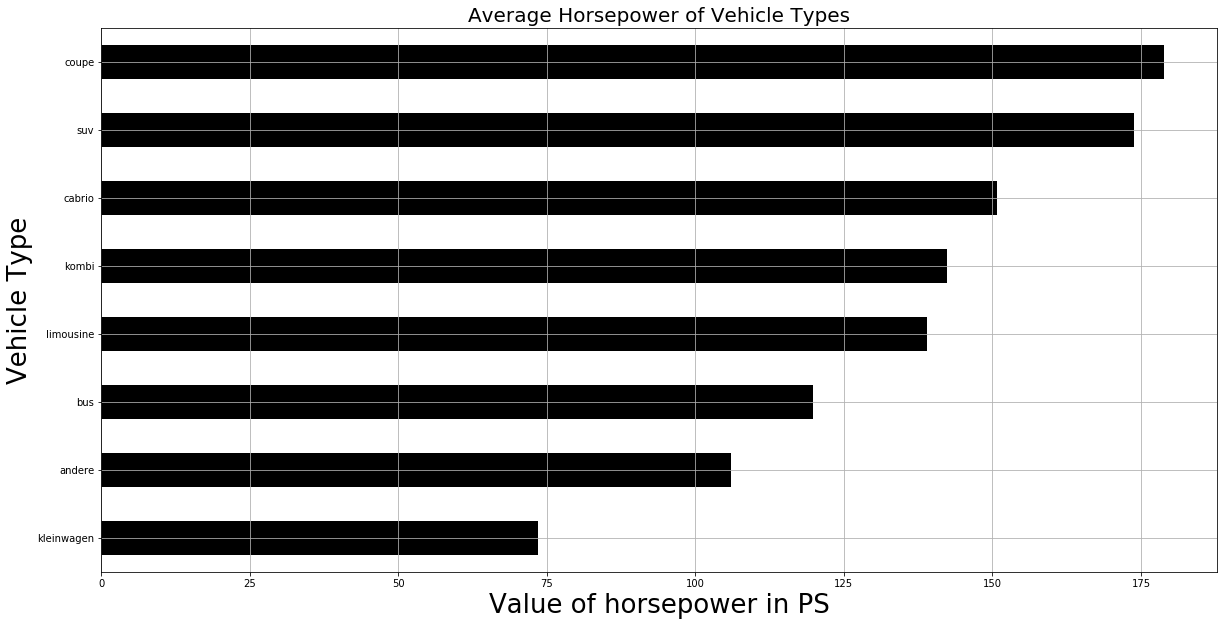

In [51]:
vehicleTypePS = autosdf.groupby('vehicleType').powerPS.mean()
vehicleTypePS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average Horsepower of Vehicle Types", fontsize=20)
plt.xlabel('Value of horsepower in PS', fontsize=26)
plt.ylabel('Vehicle Type', fontsize=26)
plt.grid(True)
plt.show()

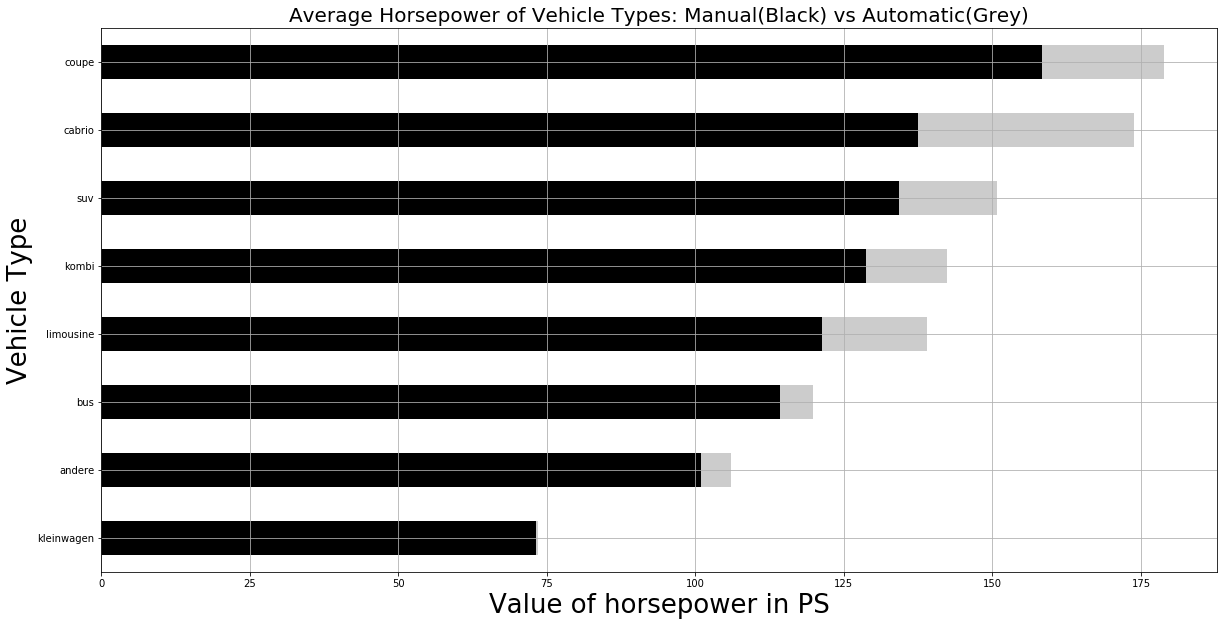

In [55]:
autovehicleTypePS = autosdf[is_automatic].groupby('vehicleType').powerPS.mean()
vehicleTypePS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)

manualvehicleTypePS = autosdf[is_manual].groupby('vehicleType').powerPS.mean()
manualvehicleTypePS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average Horsepower of Vehicle Types: Manual(Black) vs Automatic(Grey)", fontsize=20)
plt.xlabel('Value of horsepower in PS', fontsize=26)
plt.ylabel('Vehicle Type', fontsize=26)
plt.grid(True)
plt.show()

Coupes have the highest power, followed by SUV and Cabrio (Convertibles)

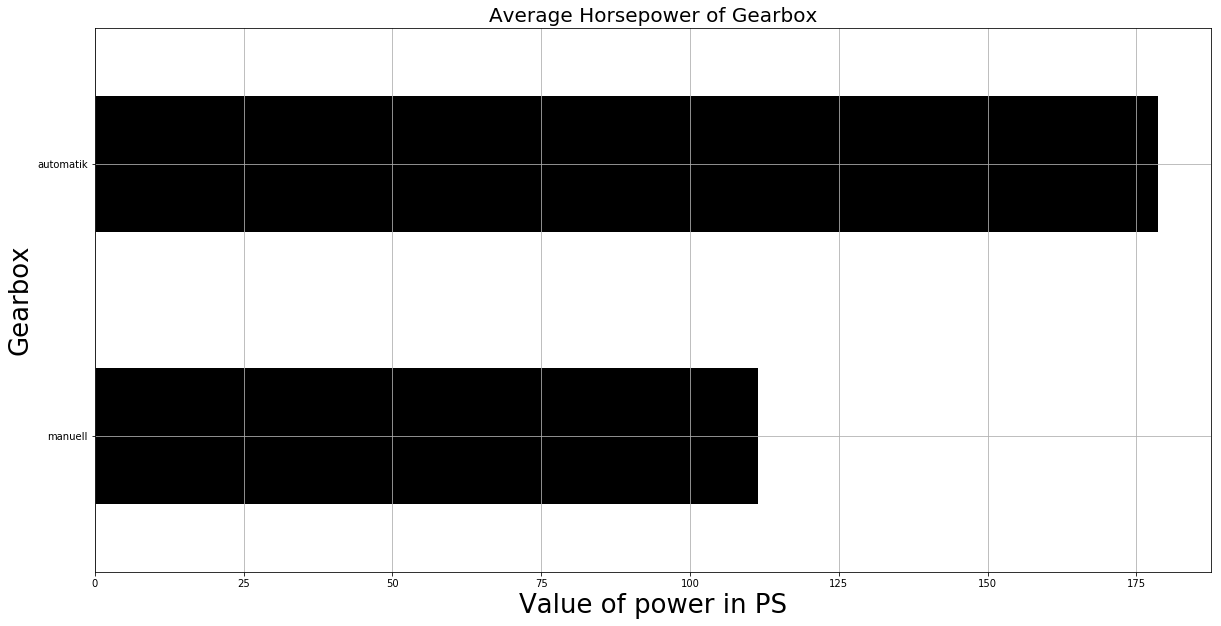

In [56]:
gearboxPS = autosdf.groupby('gearbox').powerPS.mean()
gearboxPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)

plt.title("Average Horsepower of Gearbox", fontsize=20)
plt.xlabel('Value of power in PS', fontsize=26)
plt.ylabel('Gearbox', fontsize=26)
plt.grid(True)
plt.show()

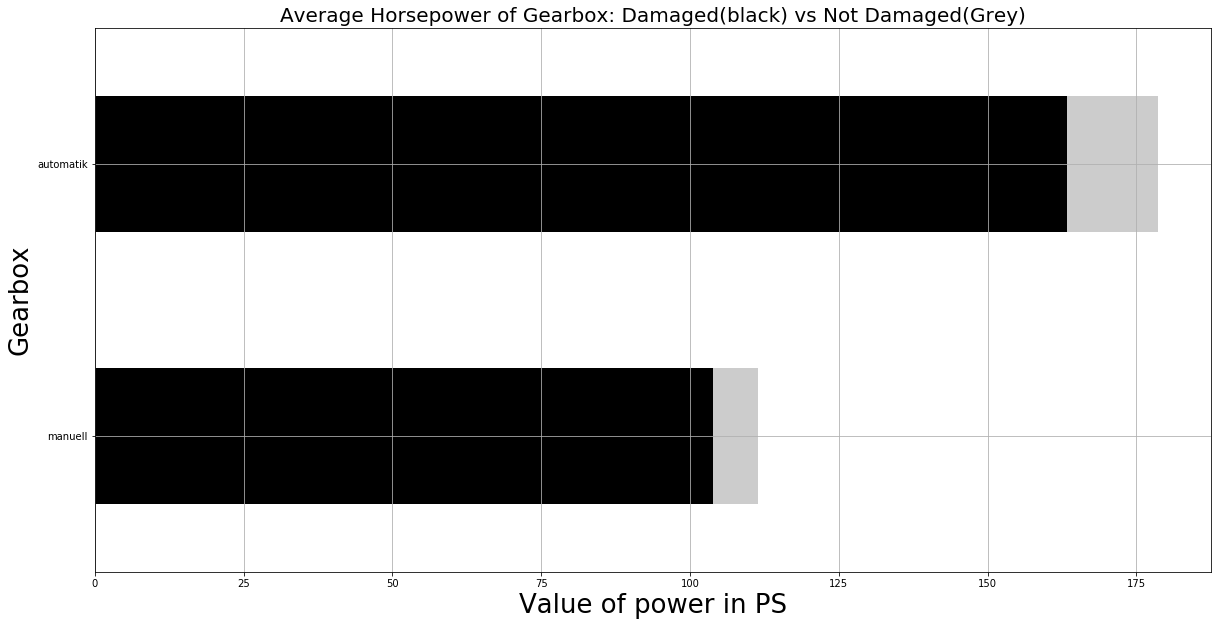

In [59]:

gearboxPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)

damagedgearboxPS = autosdf[is_damaged].groupby('gearbox').powerPS.mean()
damagedgearboxPS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=1)

plt.title("Average Horsepower of Gearbox: Damaged(black) vs Not Damaged(Grey)", fontsize=20)
plt.xlabel('Value of power in PS', fontsize=26)
plt.ylabel('Gearbox', fontsize=26)
plt.grid(True)
plt.show()

# And which fuel type runs the highest average power?

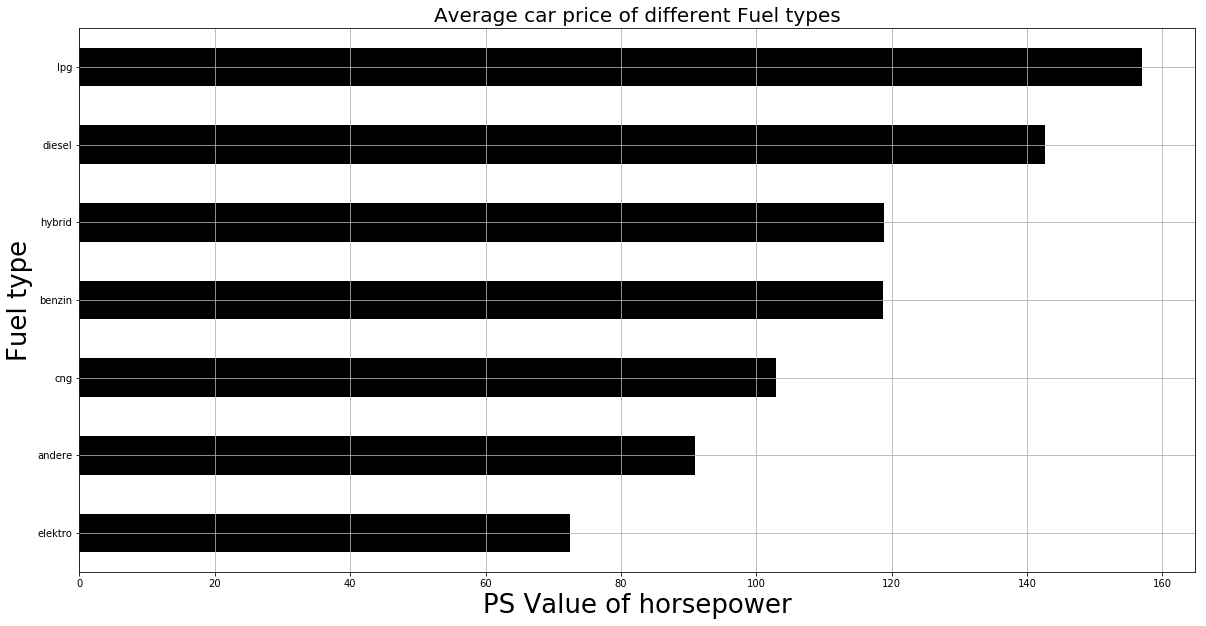

In [61]:
fuelTypePS = autosdf.groupby('fuelType').powerPS.mean()
fuelTypePS.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average car price of different Fuel types", fontsize=20)
plt.xlabel('PS Value of horsepower', fontsize=26)
plt.ylabel('Fuel type', fontsize=26)
plt.grid(True)
plt.show()

Cars that run of Liquefied Petroleum Gas have the highest horsepower.

## Average Price of vehicle types

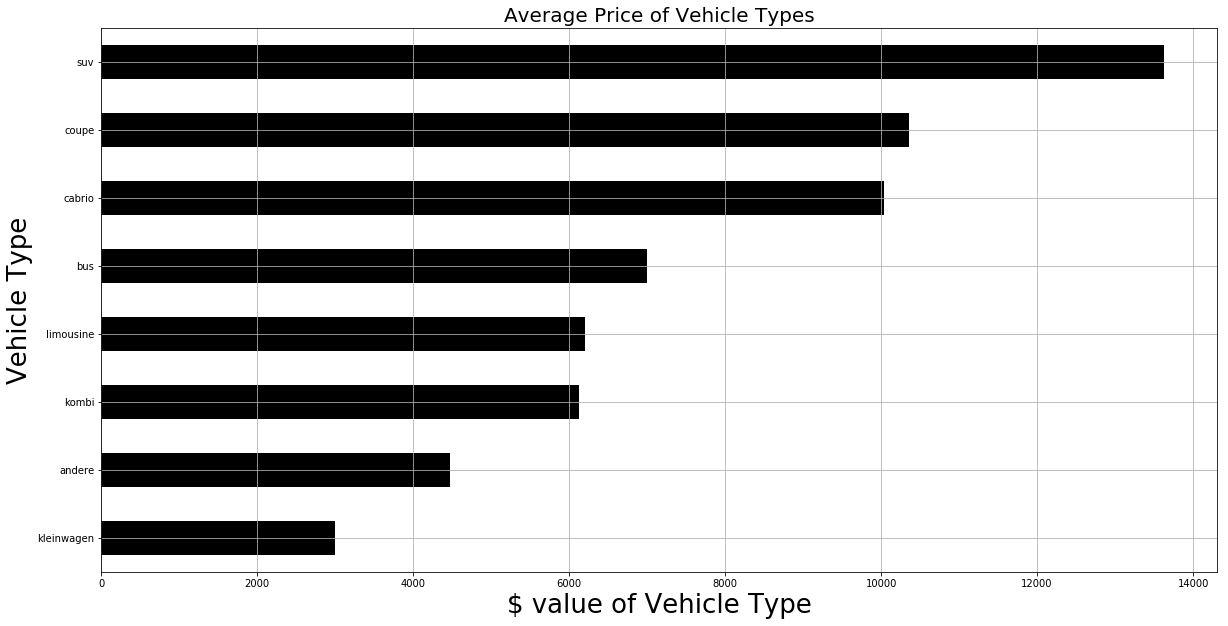

In [66]:
# average price of vehicle types

vehicleTypePrice = autosdf.groupby('vehicleType').price.mean()
vehicleTypePrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average Price of Vehicle Types", fontsize=20)
plt.xlabel('$ value of Vehicle Type', fontsize=26)
plt.ylabel('Vehicle Type', fontsize=26)
plt.grid(True)
plt.show()

# And what if they are damaged?

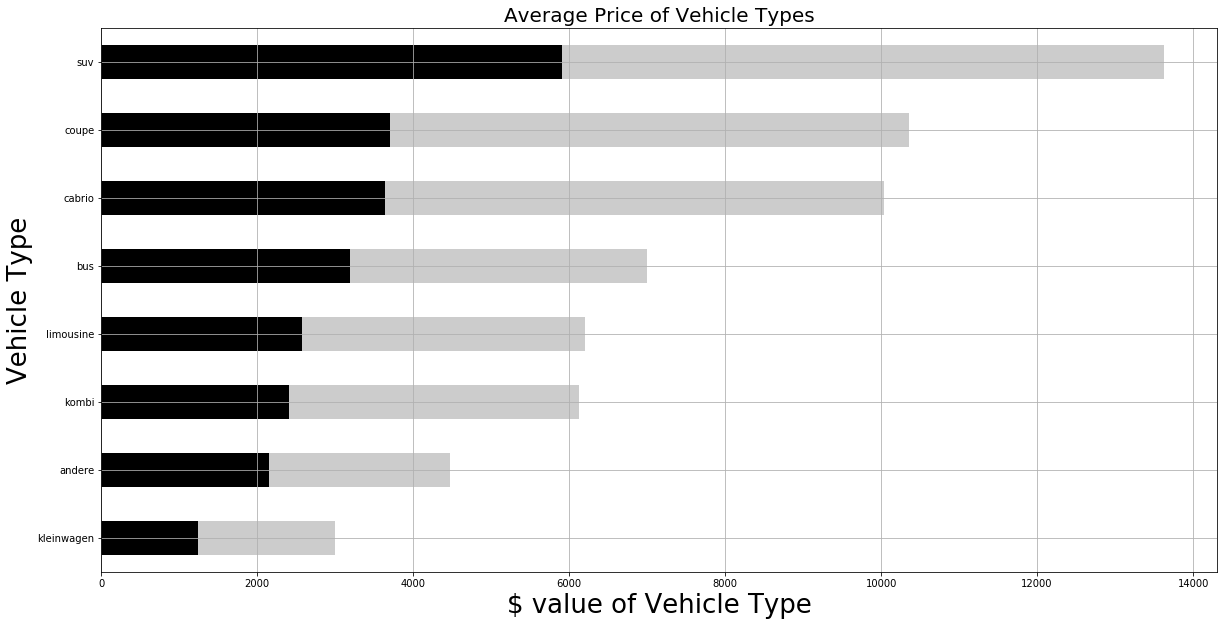

In [67]:
vehicleTypePrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)

damagedvehicleTypePrice = autosdf[is_damaged].groupby('vehicleType').price.mean()
damagedvehicleTypePrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average Price of Vehicle Types", fontsize=20)
plt.xlabel('$ value of Vehicle Type', fontsize=26)
plt.ylabel('Vehicle Type', fontsize=26)
plt.grid(True)
plt.show()

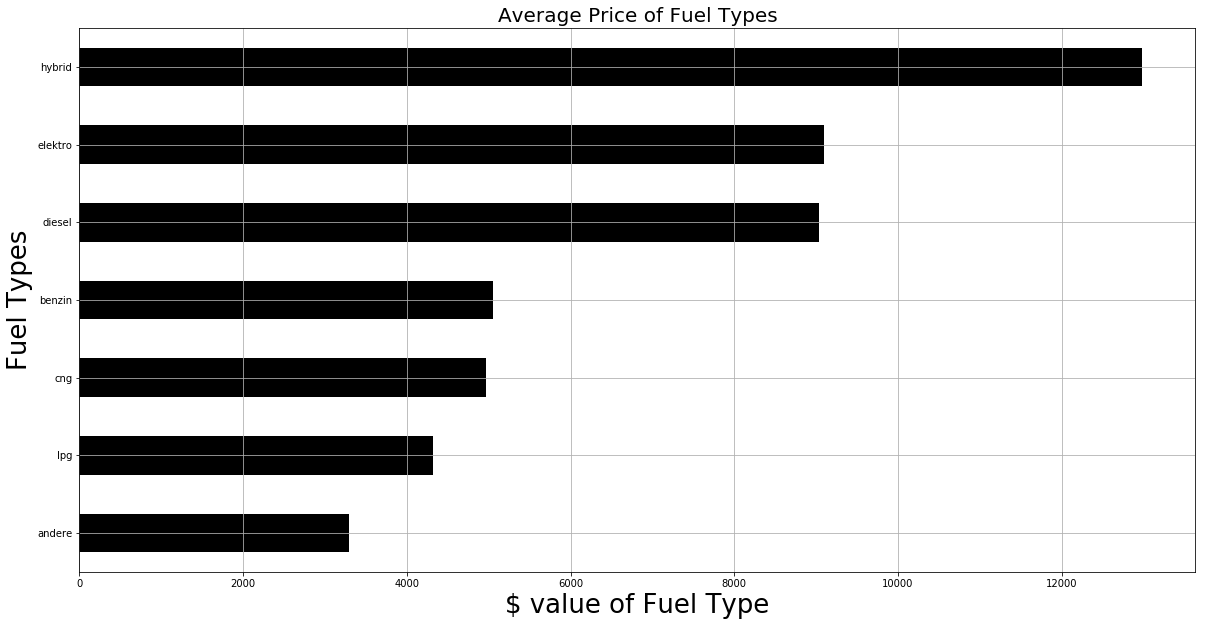

In [69]:
# average price of fuelTypes

fuelTypePrice = autosdf.groupby('fuelType').price.mean()
fuelTypePrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black')

plt.title("Average Price of Fuel Types", fontsize=20)
plt.xlabel('$ value of Fuel Type', fontsize=26)
plt.ylabel('Fuel Types', fontsize=26)
plt.grid(True)
plt.show()

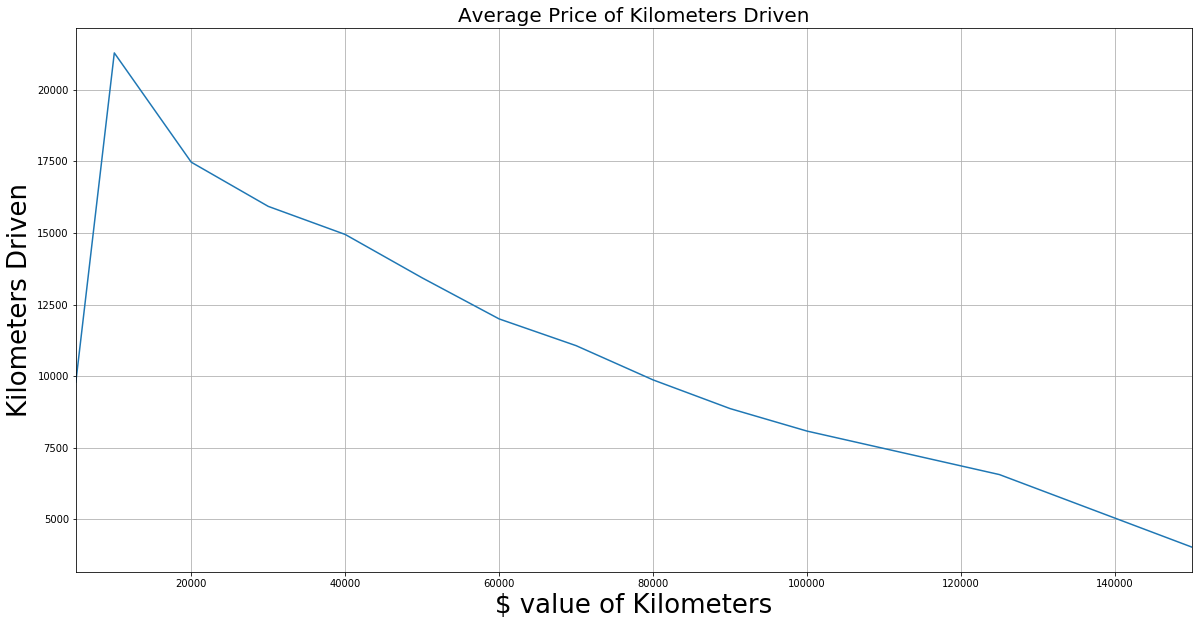

In [95]:
kilometerPriceMean = autosdf.groupby('kilometer').price.mean()
kilometerPriceMean.plot(kind="line")

plt.title("Average Price of Kilometers Driven", fontsize=20)
plt.xlabel('$ value of Kilometers', fontsize=26)
plt.ylabel('Kilometers Driven', fontsize=26)
plt.grid(True)
plt.show()

The value of cars seem to spike a little bit once past 30000kms driven, I wonder why...

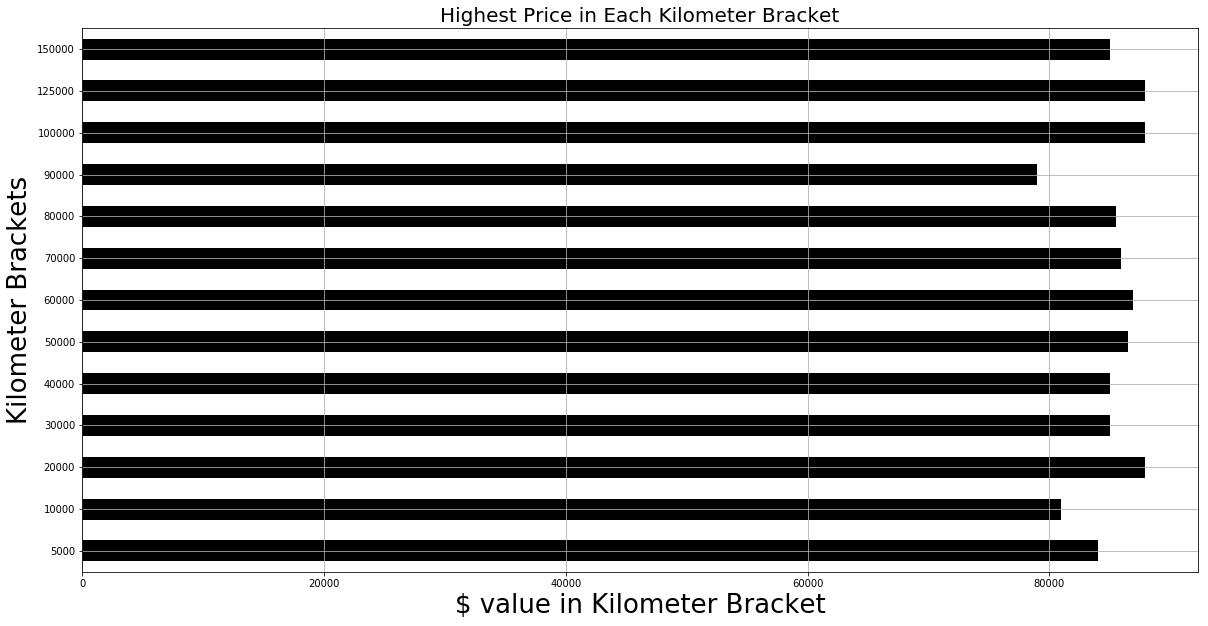

In [73]:
kilometerPriceMax = autosdf.groupby('kilometer').price.max()
kilometerPriceMax.plot(kind="barh", facecolor='black')

plt.title("Highest Price in Each Kilometer Bracket", fontsize=20)
plt.xlabel('$ value in Kilometer Bracket', fontsize=26)
plt.ylabel('Kilometer Brackets', fontsize=26)
plt.grid(True)
plt.show()

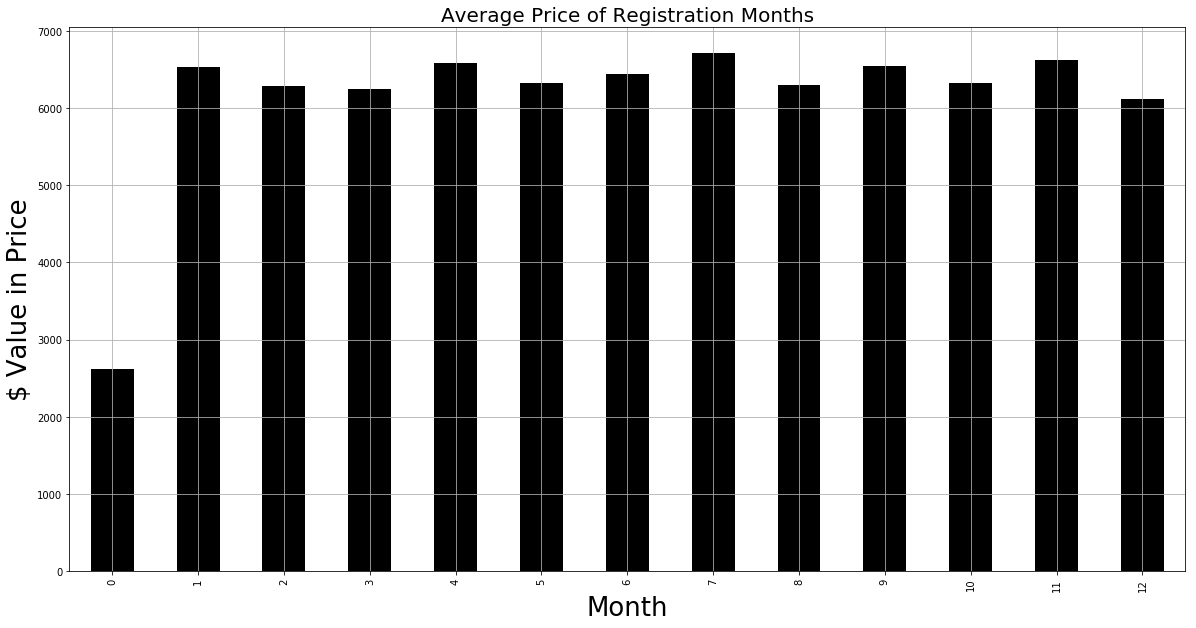

In [74]:
monthOfRegistrationPrice = autosdf.groupby('monthOfRegistration').price.mean()
monthOfRegistrationPrice.plot(kind="bar", facecolor='black')

plt.title("Average Price of Registration Months", fontsize=20)
plt.xlabel('Month', fontsize=26)
plt.ylabel('$ Value in Price', fontsize=26)
plt.grid(True)
plt.show()

Cars with no month of registration were sold at much lower prices

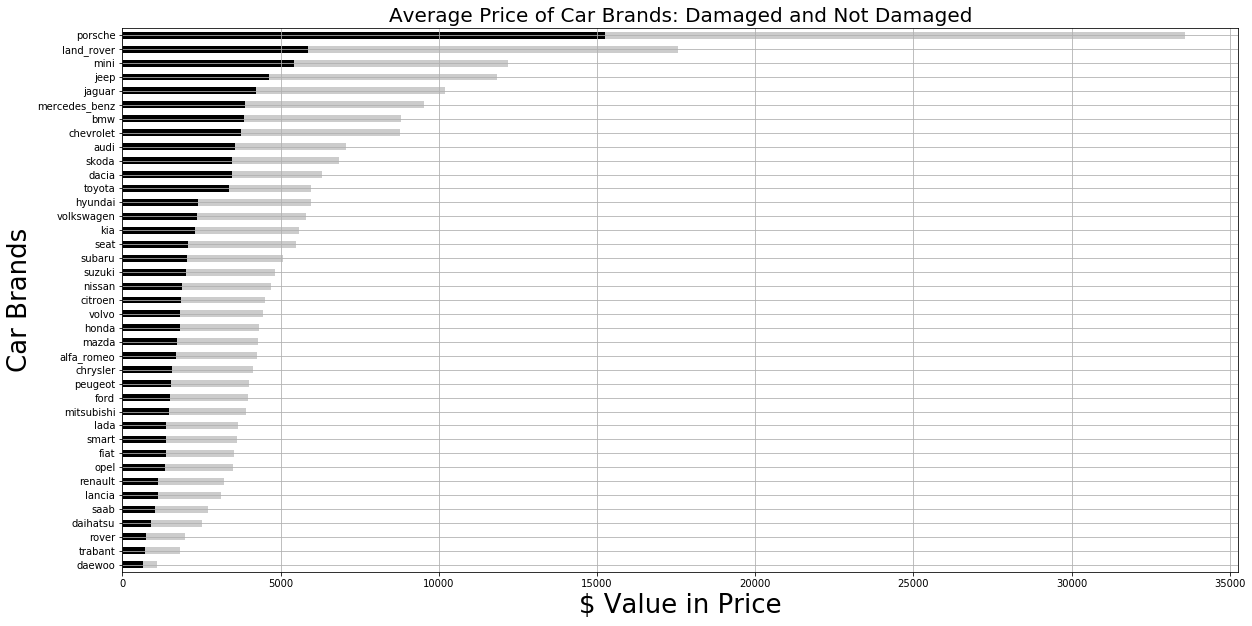

In [75]:
brandPrice = autosdf.groupby('brand').price.mean()
brandPrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=0.2)


Damaged_brandPrice = autosdf[is_damaged].groupby('brand').price.mean()
Damaged_brandPrice.sort_values(axis=0, ascending=True).plot(kind="barh", facecolor='black', alpha=1)

plt.title("Average Price of Car Brands: Damaged and Not Damaged", fontsize=20)
plt.xlabel('$ Value in Price', fontsize=26)
plt.ylabel('Car Brands', fontsize=26)
plt.grid(True)
plt.show()

Damaged Landrovers and Hyundais seem to depreciate faster, where as Audis tend to age better.

# How does being Damaged or not affect the prices of different vehicle types?

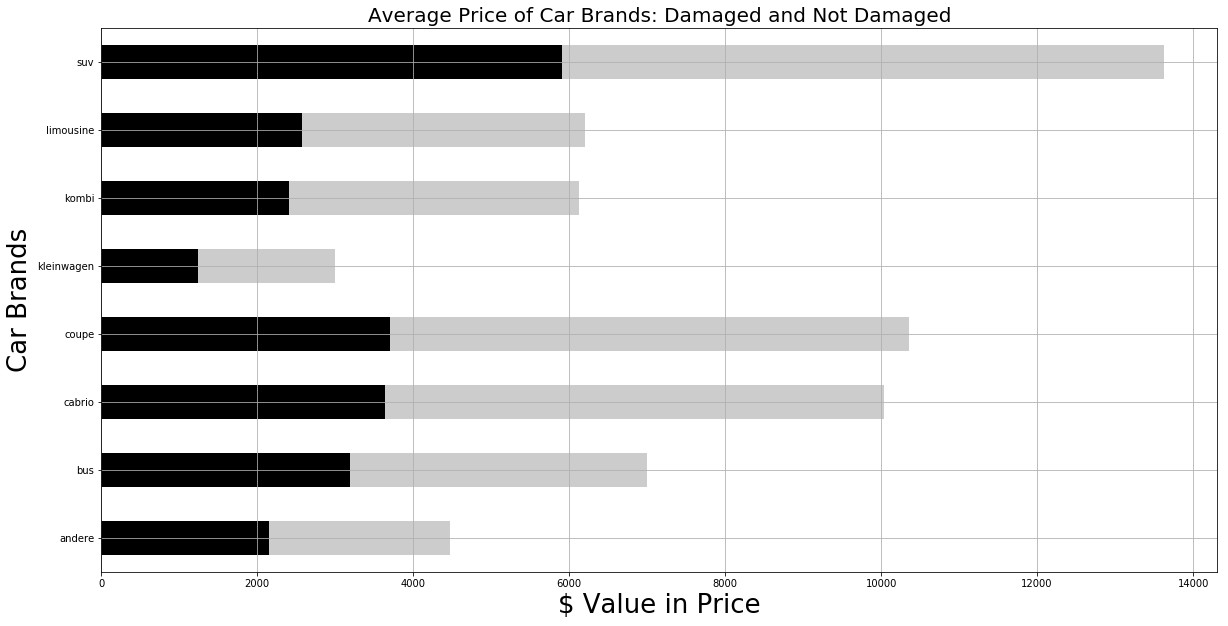

In [77]:
autosdf.groupby('vehicleType').price.mean().plot(kind='barh', facecolor="black", alpha=0.2)
autosdf[is_damaged].groupby('vehicleType').price.mean().plot(kind='barh', facecolor="black", alpha=1)

plt.title("Average Price of Car Brands: Damaged and Not Damaged", fontsize=20)
plt.xlabel('$ Value in Price', fontsize=26)
plt.ylabel('Car Brands', fontsize=26)
plt.grid(True)
plt.show()

Coupes and Cabrios depreciate much faster

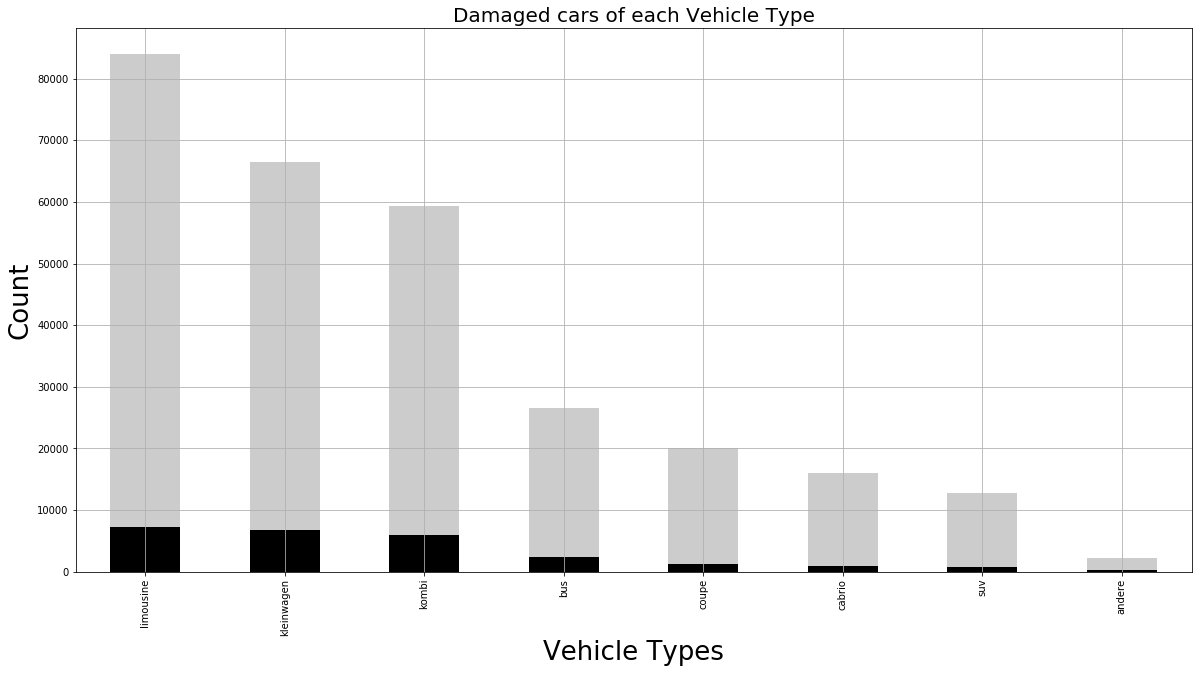

In [93]:
vehicleType_vc.plot(kind='bar', facecolor='black',alpha=0.2)

autosdf[is_damaged]['vehicleType'].value_counts().plot(kind='bar', facecolor='black',alpha=1)

plt.title("Damaged cars of each Vehicle Type", fontsize=20)
plt.xlabel('Vehicle Types', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

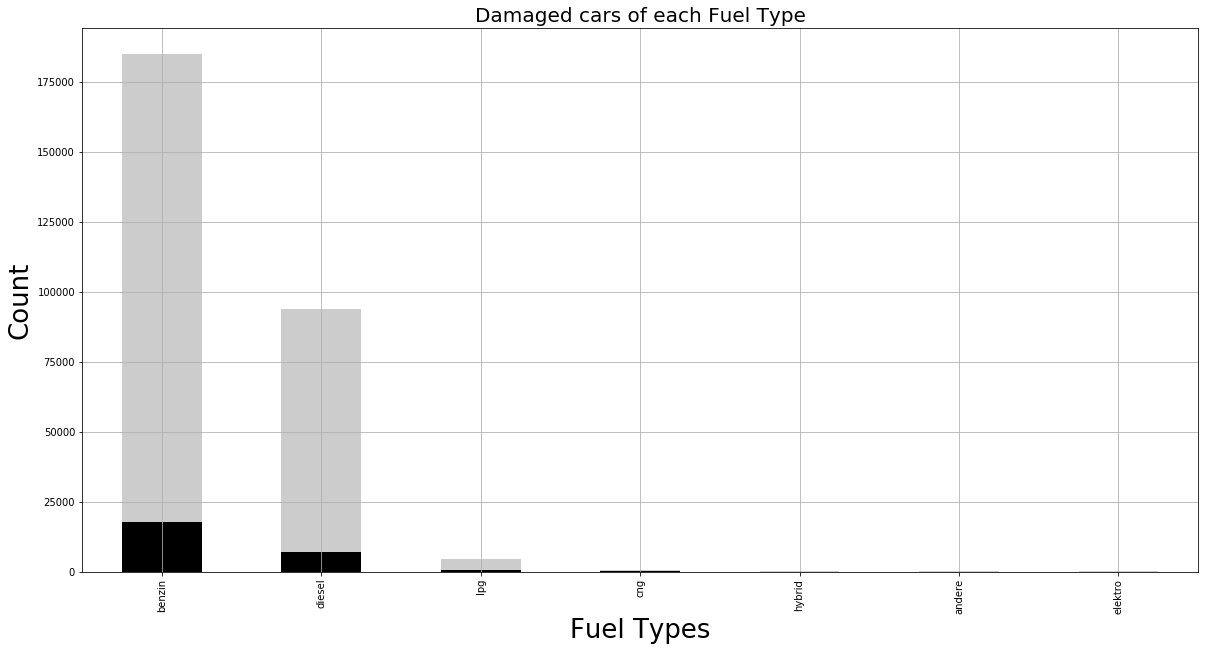

In [89]:
fuelType_vc.plot(kind='bar', facecolor='black',alpha=0.2)

autosdf[is_damaged]['fuelType'].value_counts().plot(kind='bar', facecolor='black',alpha=1)

plt.title("Damaged cars of each Fuel Type", fontsize=20)
plt.xlabel('Fuel Types', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

# Take away from the Analysis

## Register your car (or cars)

## Drive Automatic

## Be A Good Driver

## Buy An Audi